In [1]:
import random
import matplotlib.pyplot as plt

def generate_dice_values_random(num_throws=100):
    """
    Simulate rolling two dice 'num_throws' times using Python's random module.
    """
    dice_sums = []

    for _ in range(num_throws):
        die1 = random.randint(1, 6)
        die2 = random.randint(1, 6)
        dice_sums.append(die1 + die2)

    return dice_sums

In [3]:
# -----------------------------------
# 🔹 STAGE 1: Simulate Dice Rolls
# -----------------------------------

dice_sums = generate_dice_values_random(100)
print("🎲 Dice Sums from 100 Throws:")
print(dice_sums)


🎲 Dice Sums from 100 Throws:
[6, 6, 6, 6, 7, 7, 7, 2, 10, 10, 7, 6, 4, 11, 5, 7, 5, 6, 8, 7, 11, 8, 8, 8, 7, 6, 4, 4, 6, 9, 3, 8, 7, 9, 11, 9, 8, 5, 6, 2, 5, 7, 6, 7, 6, 4, 10, 2, 9, 10, 10, 10, 9, 10, 12, 8, 8, 4, 3, 10, 5, 8, 8, 8, 8, 9, 10, 2, 10, 12, 10, 5, 6, 6, 8, 6, 6, 10, 7, 5, 11, 8, 9, 10, 7, 7, 5, 6, 8, 9, 2, 5, 2, 10, 5, 7, 5, 11, 7, 6]


In [4]:
# -----------------------------------
# 🔹 STAGE 2: Ask User for a Dice Sum
# -----------------------------------

user_input = int(input("\n🔢 Enter a sum between 2 and 12 to check its frequency: "))
count = sum(1 for x in dice_sums if x == user_input)
print(f"📌 The sum {user_input} appeared {count} times.")


🔢 Enter a sum between 2 and 12 to check its frequency: 12
📌 The sum 12 appeared 2 times.


In [5]:
# -----------------------------------
# 🔹 STAGE 3: Compute PDF
# -----------------------------------

pdf = {}
total_throws = len(dice_sums)

# Initialize all sums from 2 to 12
for s in range(2, 13):
    pdf[s] = 0

# Count frequency
for value in dice_sums:
    pdf[value] += 1

# Convert to probability
for key in pdf:
    pdf[key] /= total_throws

print("\n📈 PDF - Probability Distribution Function:")
for key in sorted(pdf):
    print(f"P({key}) = {pdf[key]:.2f}")


📈 PDF - Probability Distribution Function:
P(2) = 0.06
P(3) = 0.02
P(4) = 0.05
P(5) = 0.11
P(6) = 0.17
P(7) = 0.15
P(8) = 0.15
P(9) = 0.08
P(10) = 0.14
P(11) = 0.05
P(12) = 0.02


In [6]:
# -----------------------------------
# 🔹 STAGE 4: Compute CDF
# -----------------------------------

cdf = {}
cumulative = 0
for key in sorted(pdf):
    cumulative += pdf[key]
    cdf[key] = cumulative

print("\n📉 CDF - Cumulative Distribution Function:")
for key in sorted(cdf):
    print(f"P(X ≤ {key}) = {cdf[key]:.2f}")


📉 CDF - Cumulative Distribution Function:
P(X ≤ 2) = 0.06
P(X ≤ 3) = 0.08
P(X ≤ 4) = 0.13
P(X ≤ 5) = 0.24
P(X ≤ 6) = 0.41
P(X ≤ 7) = 0.56
P(X ≤ 8) = 0.71
P(X ≤ 9) = 0.79
P(X ≤ 10) = 0.93
P(X ≤ 11) = 0.98
P(X ≤ 12) = 1.00


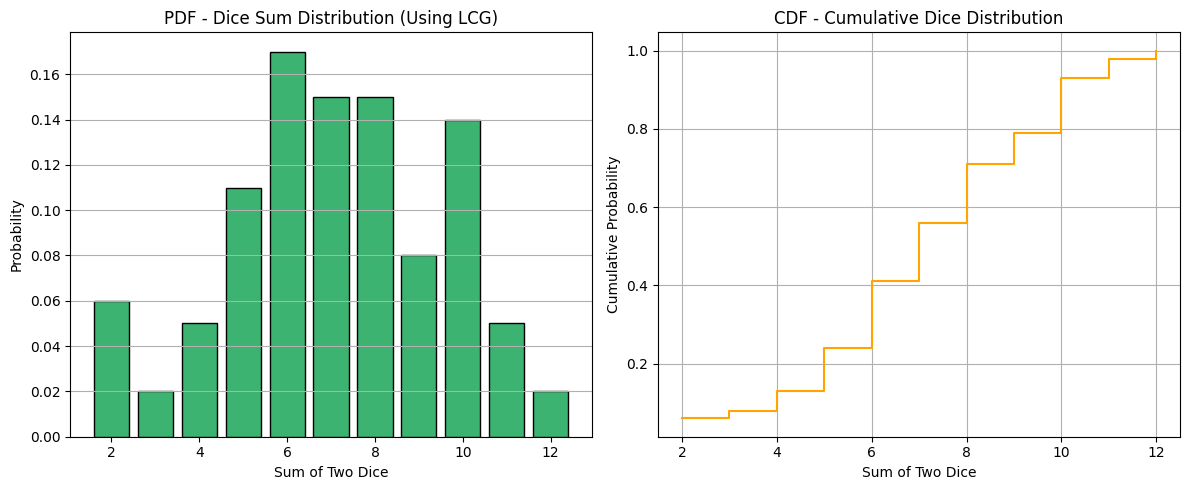

In [7]:
# -----------------------------------
# 🔹 STAGE 5: Plotting PDF and CDF
# -----------------------------------

plt.figure(figsize=(12, 5))

# PDF Plot
plt.subplot(1, 2, 1)
plt.bar(pdf.keys(), pdf.values(), color='mediumseagreen', edgecolor='black')
plt.title("PDF - Dice Sum Distribution (Using LCG)")
plt.xlabel("Sum of Two Dice")
plt.ylabel("Probability")
plt.grid(axis='y')

# CDF Plot
plt.subplot(1, 2, 2)
cdf_values = [cdf[k] for k in sorted(cdf)]
plt.step(sorted(cdf.keys()), cdf_values, where='post', color='orange')
plt.title("CDF - Cumulative Dice Distribution")
plt.xlabel("Sum of Two Dice")
plt.ylabel("Cumulative Probability")
plt.grid()

plt.tight_layout()
plt.show()